In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = pd.read_csv('cleaned_dataset.csv')
data.head()


,Pressure,Flow_Rate,Temperature,Vibration,RPM,Operational_Hours,Zone,Block,Pipe,Location_Code,Latitude,Longitude,Leakage_Flag
0,0.492896,-0.409652,-0.689965,-0.159422,0.372874,-0.807397,Zone_4,Block_2,Pipe_3,Zone_4_Block_2_Pipe_3,-0.357039,-0.227982,-0.262795
1,-0.144389,-0.439003,-0.316473,-0.049012,0.306807,-1.245899,Zone_3,Block_4,Pipe_1,Zone_3_Block_4_Pipe_1,-1.559091,-1.811754,-0.262795
2,0.644419,-1.767500,-0.608744,0.047626,-0.933784,1.253751,Zone_2,Block_2,Pipe_5,Zone_2_Block_2_Pipe_5,1.587852,0.811539,-0.262795
3,1.522941,-0.316940,0.099998,0.927345,0.608106,1.318474,Zone_5,Block_3,Pipe_2,Zone_5_Block_3_Pipe_2,0.239349,0.437613,-0.262795
4,-0.240626,0.735105,1.188206,-0.761269,-1.496762,-0.798589,Zone_3,Block_1,Pipe_1,Zone_3_Block_1_Pipe_1,-1.406398,-1.735822,-0.262795


In [ ]:
data.fillna(method='ffill', inplace=True)

X = data.drop('Leakage_Flag', axis=1)
y = data['Leakage_Flag']

categorical_cols = X.select_dtypes(include='object').columns
numeric_cols = X.select_dtypes(exclude='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 0.0956
R² Score: 0.9894
MAE: 0.0053
MAPE: 1.08%


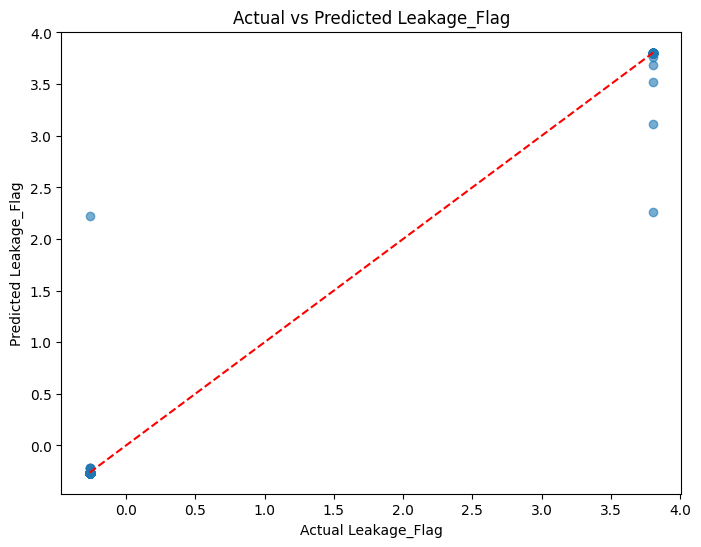

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Leakage_Flag')
plt.ylabel('Predicted Leakage_Flag')
plt.title('Actual vs Predicted Leakage_Flag')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


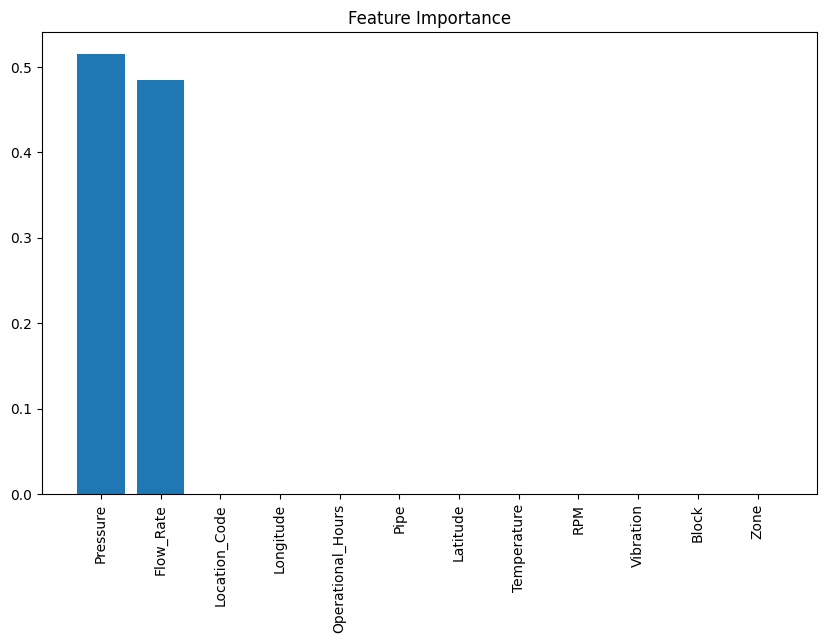

In [28]:
importances = rf_reg.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.show()


In [29]:
joblib.dump(rf_reg, 'rf_leakage_model.pkl')

loaded_model = joblib.load('rf_leakage_model.pkl')
new_predictions = loaded_model.predict(X_test[:5])
print("Sample Predictions:", new_predictions)


Sample Predictions: [-0.26279529 -0.26279529 -0.26279529  3.76456286 -0.26279529]
